# Boston Housing Data Set Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
#See the sklearn documenation for the explination of these columns
data = load_boston()
boston = pd.DataFrame(data=data.data, columns = data.feature_names)
boston['MEDV'] = data.target

### Begining Data Analysis

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


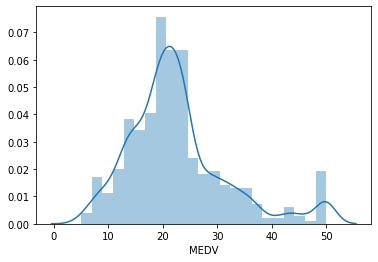

In [32]:
#MEDV is the medium value of the price in 10,000. Keep in mind this dataset is from the 80s
sns.distplot(boston['MEDV'])

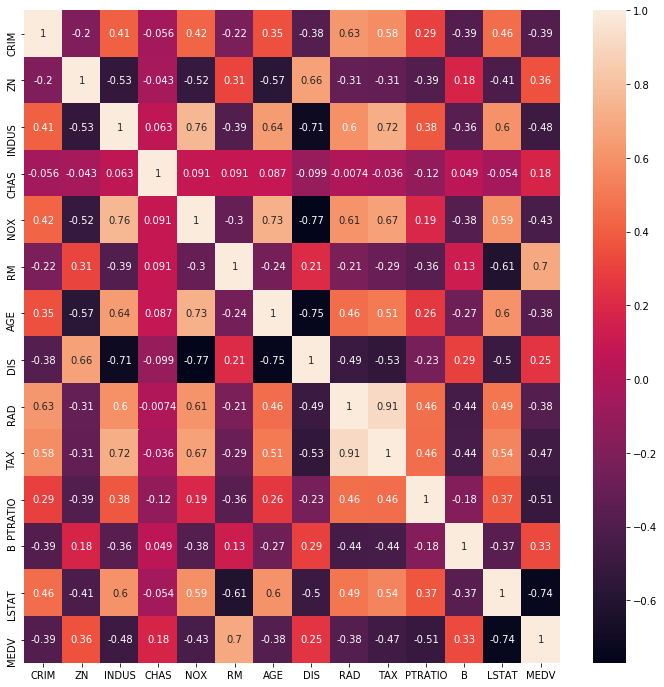

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(boston.corr(), annot=True)

### Regression Model Training

In [47]:
X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = boston['MEDV']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Regression Model Interpretation

In [50]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
CRIM,-0.067171
ZN,0.051506
INDUS,0.020228
CHAS,1.840853
NOX,-14.080071
RM,4.754385
AGE,-0.008974
DIS,-1.333247
RAD,0.296851
TAX,-0.014355


Interesting that the proportion of Black population has a very small positive coefficient on price, and that the nitric oxides has such a large influence on the data set.

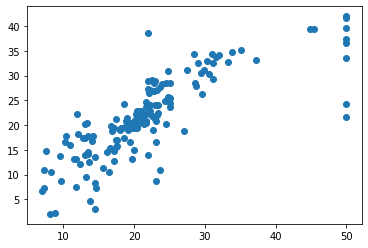

In [53]:
#Our predictions are okay but not great, especially on the outliers on the edges
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

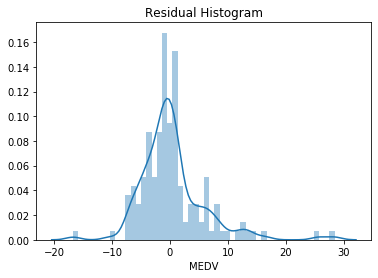

In [56]:
sns.distplot((y_test - predictions), bins=50)
plt.title('Residual Histogram')
plt.show()

In [60]:
print(f'Root Mean squared error is {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Root Mean squared error is 5.735304637767272
